In [19]:
!pip install backtrader

In [20]:
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load CSV data into Pandas
csv_file = '/content/AAPL_5year.csv'

data = pd.read_csv(csv_file, parse_dates=True, index_col='Date')

print(data.head())

               Open    High      Low    Close   Volume  Open Interest
Date                                                                 
2019-09-27  55.1100  55.240  54.3200  54.7050   738564          95262
2019-09-30  55.2250  56.145  55.1975  55.9925   757371          97616
2019-10-01  56.2825  57.055  56.0500  56.1475  1058545         129508
2019-10-02  55.7725  55.895  54.4825  54.7400  1028774         129436
2019-10-03  54.6325  55.240  53.7825  55.2050   862534         106467


In [21]:
class MovingAverageCrossover(bt.Strategy):
  params = (('short_period',5),('long_period',20)) # define 5 days is short-period , 20 days is long-pediod

  def __init__(self):
    self.sma_short = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.short_period) # calculate sma by closing price
    self.sma_long =  bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.long_period)

  def next(self):
    if self.sma_short > self.sma_long and not self.position:
      self.buy(size=100) # enter long position
    elif self.sma_short < self.sma_long and self.position:
      self.sell(size=100) # exit position


In [22]:
cerebro = bt.Cerebro() # connect with cerebro

In [23]:
# make data to feed cerebro
# use pandas because we can use with data from yahoofinance , interactive broker if we want.
data_feed = bt.feeds.PandasData(dataname=data)

In [24]:
data_feed


In [25]:
cerebro.adddata(data_feed)
cerebro.addstrategy(MovingAverageCrossover)

0

In [26]:
cerebro.run()

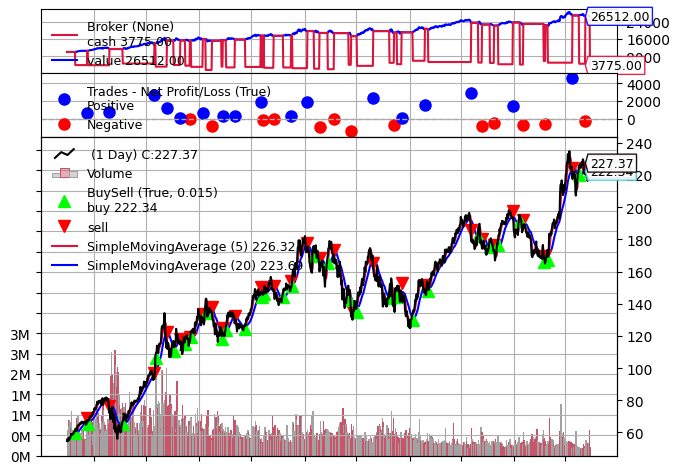

In [27]:
cerebro.plot(iplot=False)
plt.show()